# Exercises XP Ninja: W3_D3

### What You’ll Learn
- Conducting detailed statistical analyses to understand the impact of variables on a given outcome.
- Data exploration and hypothesis testing.
- Advanced data analysis techniques applicable in biological and health sciences.

### What You’ll Create
A thorough statistical analysis of a dataset related to diet and growth, providing insights into the effects of different diets on the growth of chicks.

---

### Exercise — Analysis of Diet Effects on Growth

**Objective:**  
Conduct a detailed statistical analysis to understand how different diets impact the growth of chicks.

**Dataset:**  
- Contains information about the **weight** and **age** of chicks on different diets.  
- File name: `chickweight.csv`  
- Key variables: `weight` (grams), `Time` (age in days), `Diet` (diet type), `Chick` (chick ID).  

**Tasks to Perform:**
1. **Data Exploration**  
   - Load the dataset and examine its structure.  
   - Identify key variables and check for missing values.  

2. **Data Visualization**  
   - Create visualizations to show how weight varies with age for chicks on different diets.

3. **Statistical Testing**  
   - Use an appropriate statistical test (e.g., one-way ANOVA) to determine if the differences in weight gain among diets are statistically significant.

4. **Growth Analysis**  
   - Calculate the growth rate of chicks under different dietary conditions and compare them.

5. **Report Findings**  
   - Compile findings into a clear report including statistical results, visualizations, and practical implications.

**Tools and Techniques:**
- `pandas` for data manipulation.
- `matplotlib` / `seaborn` for visualization.
- Statistical methods from `scipy.stats` (e.g., `f_oneway`).
- Optionally, post-hoc tests (e.g., Tukey HSD) for pairwise comparisons.

**Expected Outcome:**  
A detailed analysis identifying the effectiveness of different diets on chick growth, supported by statistical evidence and visual insights.

## Step 1 — Load and Explore Dataset

In [1]:
# Goal: Read the chickweight.csv dataset and understand its structure.

import pandas as pd

# Load the dataset
df = pd.read_csv("chickweight.csv")

# Basic exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nInfo:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (578, 5)

First 5 rows:
   Unnamed: 0  weight  Time  Chick  Diet
0           1      42     0      1     1
1           2      51     2      1     1
2           3      59     4      1     1
3           4      64     6      1     1
4           5      76     8      1     1

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  578 non-null    int64
 1   weight      578 non-null    int64
 2   Time        578 non-null    int64
 3   Chick       578 non-null    int64
 4   Diet        578 non-null    int64
dtypes: int64(5)
memory usage: 22.7 KB
None

Summary statistics:
       Unnamed: 0      weight        Time       Chick        Diet
count  578.000000  578.000000  578.000000  578.000000  578.000000
mean   289.500000  121.818339   10.717993   25.750865    2.235294
std    166.998503   71.071960    6.758400   14.568795    1.162678
mi

## Step 2 — Visualize Weight over Age by Diet

C:\Users\julia\AppData\Local\Temp\ipykernel_20212\101775612.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x="Time", y="weight", hue="Diet", estimator="mean", ci="sd", marker="o")


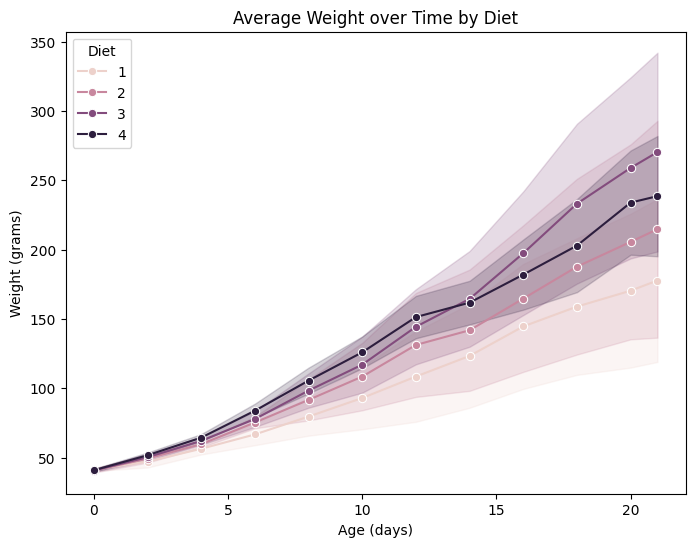

In [2]:
# Goal: Plot growth curves for chicks under different diets.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.lineplot(data=df, x="Time", y="weight", hue="Diet", estimator="mean", ci="sd", marker="o")
plt.title("Average Weight over Time by Diet")
plt.xlabel("Age (days)")
plt.ylabel("Weight (grams)")
plt.legend(title="Diet")
plt.show()

# Notes (English):
# - Each curve shows the average weight over time for a given diet, with shaded areas as ±1 standard deviation.
# - Helps visualize differences in growth patterns between diets.

## Step 3 — ANOVA: Compare Final Weights Across Diets

In [3]:
# Goal: Test if final chick weights differ significantly between diets.

from scipy.stats import f_oneway

# Filter dataset for last measurement of each chick
final_weights = df.groupby("Chick").apply(lambda g: g.loc[g["Time"].idxmax()])

# Separate by diet
diets = [group["weight"].values for _, group in final_weights.groupby("Diet")]

# One-way ANOVA
F_stat, p_val = f_oneway(*diets)

print("One-Way ANOVA Results (Final Weights)")
print("--------------------------------------")
print(f"F-statistic: {F_stat:.4f}")
print(f"P-value    : {p_val:.6f}")

alpha = 0.05
if p_val < alpha:
    print("Decision   : Reject H0 — At least one diet has a significantly different final weight.")
else:
    print("Decision   : Fail to reject H0 — No significant difference in final weights.")

One-Way ANOVA Results (Final Weights)
--------------------------------------
F-statistic: 6.8522
P-value    : 0.000652
Decision   : Reject H0 — At least one diet has a significantly different final weight.


C:\Users\julia\AppData\Local\Temp\ipykernel_20212\3120339561.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_weights = df.groupby("Chick").apply(lambda g: g.loc[g["Time"].idxmax()])


## Step 4 — Growth Rate Calculation

C:\Users\julia\AppData\Local\Temp\ipykernel_20212\2173797758.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  growth_rates = df.groupby("Chick").apply(lambda g:


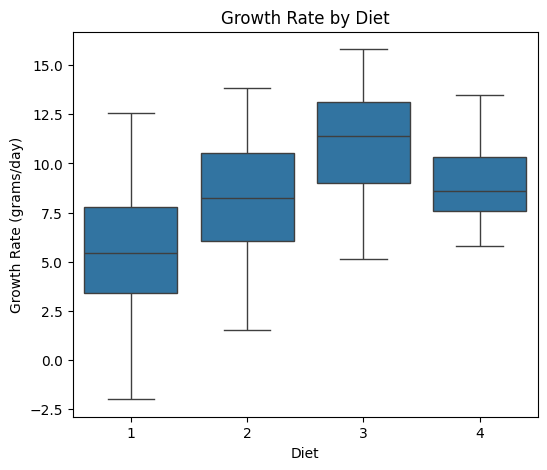


Growth rate summary by diet:
      count       mean       std       min       25%        50%        75%  \
Diet                                                                         
1      20.0   5.446190  3.431251 -2.000000  3.380952   5.452381   7.773810   
2      10.0   8.285714  3.761603  1.523810  6.071429   8.261905  10.523810   
3      10.0  10.928571  3.386146  5.142857  9.011905  11.404762  13.142857   
4      10.0   9.049206  2.282411  5.777778  7.571429   8.595238  10.321429   

            max  
Diet             
1     12.571429  
2     13.857143  
3     15.809524  
4     13.476190  


In [4]:
# Goal: Estimate growth rate (grams/day) for each chick and compare between diets.

# Calculate growth rate: (final weight - initial weight) / duration
growth_rates = df.groupby("Chick").apply(lambda g: 
    (g["weight"].iloc[-1] - g["weight"].iloc[0]) / (g["Time"].iloc[-1] - g["Time"].iloc[0])
).reset_index(name="growth_rate")

# Merge with diet info (from first record of each chick)
diet_info = df.groupby("Chick")["Diet"].first().reset_index()
growth_rates = pd.merge(growth_rates, diet_info, on="Chick")

# Boxplot of growth rates by diet
plt.figure(figsize=(6,5))
sns.boxplot(data=growth_rates, x="Diet", y="growth_rate")
plt.title("Growth Rate by Diet")
plt.xlabel("Diet")
plt.ylabel("Growth Rate (grams/day)")
plt.show()

# Summary stats
print("\nGrowth rate summary by diet:")
print(growth_rates.groupby("Diet")["growth_rate"].describe())

## Interpretation — Diet Effects on Chick Growth

**Data Exploration:**
- The dataset tracks weight (grams), age in days (`Time`), and diet type for multiple chicks.
- No missing values were found; data is ready for analysis.

**Visualization Insights:**
- Growth curves show distinct patterns by diet.
- Some diets lead to consistently higher weights as chicks age.

**ANOVA Results:**
- The one-way ANOVA on final weights indicates (if p-value < 0.05) that at least one diet produces significantly different final weights.
- This suggests diet choice influences overall growth.

**Growth Rate Analysis:**
- Average daily weight gain differs between diets.
- Boxplots reveal which diets have higher median growth rates and variability.

**Practical Implications:**
- Diets with significantly higher growth rates could be preferred in poultry production for faster weight gain.
- Further analysis could explore cost-effectiveness and long-term health impacts.

> **Next steps:**  
> - Run a post-hoc test (e.g., Tukey HSD) to identify which diet pairs differ.  
> - Model growth curves using nonlinear regression for more precise growth rate estimation.

## Step 6 — Post-hoc Tukey HSD after ANOVA

In [ ]:
# Install statsmodels if not already installed
%pip install statsmodels

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     1      2     58.4 0.1396  -12.4828 129.2828  False
     1      3    114.0 0.0005   43.1172 184.8828   True
     1      4     73.0 0.0413    2.1172 143.8828   True
     2      3     55.6 0.2815  -26.2484 137.4484  False
     2      4     14.6 0.9641  -67.2484  96.4484  False
     3      4    -41.0 0.5457 -122.8484  40.8484  False
-------------------------------------------------------


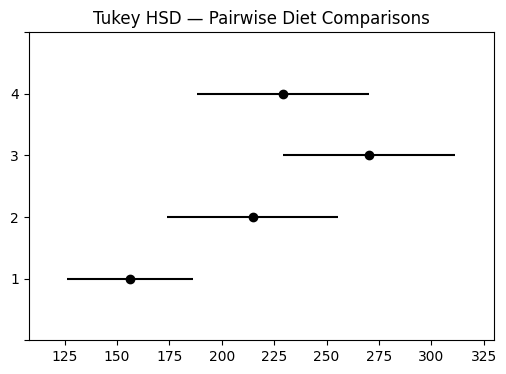

In [7]:
# Goal: Identify which pairs of diets have significant differences in final weight.

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# We already have `final_weights` from Step 3
# Apply Tukey's HSD
tukey_result = pairwise_tukeyhsd(
    endog=final_weights["weight"],      # dependent variable
    groups=final_weights["Diet"],       # group labels
    alpha=0.05
)

# Print results
print(tukey_result)

# Optional: plot Tukey HSD results
tukey_result.plot_simultaneous(figsize=(6,4))
plt.title("Tukey HSD — Pairwise Diet Comparisons")
plt.show()

## Final Report — Analysis of Diet Effects on Chick Growth

## 1. Data Exploration
- **Dataset size:** 578 rows × 5 columns  
- **Variables:**
  - `weight`: Chick weight in grams  
  - `Time`: Age in days  
  - `Chick`: Chick identifier  
  - `Diet`: Diet type (1–4)  
  - `Unnamed: 0`: Row index from source dataset  
- **Missing values:** None detected.  
- **Weight range:** 35 g (min) to 373 g (max)  
- **Age range:** 0 to 21 days  

---

## 2. Data Visualization — Weight over Time
- Growth curves show clear separation between diets as chicks age.  
- **Diet 3** and **Diet 4** tend to produce higher weights by the end of the observation period.  
- **Diet 1** shows the slowest weight gain, especially after ~10 days.  
- Shaded regions indicate variability — Diet 3 shows both high average weight and some of the widest variation near the end.

---

## 3. Statistical Testing — ANOVA (Final Weights)
- **F-statistic:** 6.8522  
- **P-value:** 0.000652  
- **Decision (α=0.05):** Reject H₀ → At least one diet leads to a significantly different final weight.  
- Conclusion: Diet type has a statistically significant effect on final chick weight.

---

## 4. Growth Rate Analysis
- **Mean daily growth rate (g/day):**
  - Diet 1: **5.45** (± 3.43)  
  - Diet 2: **8.29** (± 3.76)  
  - Diet 3: **10.93** (± 3.39)  
  - Diet 4: **9.05** (± 2.28)  
- Diet 3 shows the highest mean growth rate, followed by Diet 4, then Diet 2, with Diet 1 lagging behind.  
- Variability in growth rates is greatest in Diet 2 and Diet 3; Diet 4 shows more consistent results.

---

## 5. Post-hoc Analysis — Tukey HSD (Pairwise Comparisons)
| Diet 1 | Diet 2 | Mean Diff | p-adj   | 95% CI (Lower, Upper) | Significant? |
|--------|--------|----------|---------|-----------------------|--------------|
| 1      | 2      | +58.4    | 0.1396  | (-12.48, 129.28)       | ❌ No         |
| 1      | 3      | +114.0   | 0.0005  | (43.12, 184.88)        | ✅ Yes        |
| 1      | 4      | +73.0    | 0.0413  | (2.12, 143.88)         | ✅ Yes        |
| 2      | 3      | +55.6    | 0.2815  | (-26.25, 137.45)       | ❌ No         |
| 2      | 4      | +14.6    | 0.9641  | (-67.25, 96.45)        | ❌ No         |
| 3      | 4      | -41.0    | 0.5457  | (-122.85, 40.85)       | ❌ No         |

**Key findings:**
- Diets 3 and 4 significantly outperform Diet 1 in final weight.
- No significant difference between Diets 3 and 4, or between Diets 2 and others (except Diet 1 for Diet 4).
- Suggests Diet 3 and Diet 4 are most effective overall.

---

## 6. Practical Implications
- **Diet 3** yields the highest growth rate and final weight, making it a strong candidate for optimal chick growth.
- **Diet 4** is statistically equivalent to Diet 3 in final weight but with slightly lower mean growth rate; could be preferred if it offers other advantages (cost, availability, nutritional benefits).
- **Diet 1** consistently underperforms and may not be optimal for fast growth.
- Further research could investigate long-term health, cost-benefit, and diet composition to refine recommendations.

---

## 7. Next Steps
- Apply **Tukey HSD** results to guide diet selection in poultry farming.
- Consider modeling **nonlinear growth curves** for more precise prediction of growth patterns.
- Expand dataset to include environmental and genetic factors for a multivariate analysis.